<a href="https://colab.research.google.com/github/annapermiakova/AutID/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Aut1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обработка файлов пошагово
1. Конвертация в формат  mp4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
import os
import subprocess


В скрипте ниже происходит конвертация в формат mp4 следующих файлов: два файла нормы Norma/VTS_01.VOB и Norma/VTS_02.VOB  которые длятся по 5 мин и 5 файлов не нормы по 1 мин: Ne_norma/F_20.2.MOV, Ne_norma/F_2.5.mp4,  Ne_norma/F_2.3., Ne_norma/F_20.3.MOV , и Ne_norma/F_4.1.mp4 . Файлы складываются в папку output_norma_path = "/content/drive/MyDrive/Autism/Norma_Converted"
output_ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma_Converted"


In [ ]:
def convert_videos_to_mp4(input_folder, output_folder):
    # Создаем выходную папку, если ее нет
    os.makedirs(output_folder, exist_ok=True)

    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        # Пропускаем файлы, которые не являются видео
        if not file_name.lower().endswith(('.mp4', '.mov', '.vob')):
            continue

        # Создаем выходной путь для файла
        base_name = os.path.splitext(file_name)[0]
        output_path = os.path.join(output_folder, f"{base_name}.mp4")

        # Команда ffmpeg для конвертации
        command = [
            'ffmpeg',
            '-i', input_path,
            '-c:v', 'libx264',  # Кодек для видео
            '-c:a', 'aac',      # Кодек для аудио
            '-strict', 'experimental',
            '-y',               # Перезапись выходного файла
            output_path
        ]

        # Запуск команды
        print(f"Конвертируется файл {input_path} -> {output_path}")
        subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Пути к папкам
norma_path = "/content/drive/MyDrive/Autism/Norma"
ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma"

# Выходные папки
output_norma_path = "/content/drive/MyDrive/Autism/Norma_Converted"
output_ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma_Converted"

# Конвертация видеофайлов
convert_videos_to_mp4(norma_path, output_norma_path)
convert_videos_to_mp4(ne_norma_path, output_ne_norma_path)


Конвертируется файл /content/drive/MyDrive/Autism/Norma/VTS_01.VOB -> /content/drive/MyDrive/Autism/Norma_Converted/VTS_01.mp4
Конвертируется файл /content/drive/MyDrive/Autism/Norma/VTS_02.VOB -> /content/drive/MyDrive/Autism/Norma_Converted/VTS_02.mp4
Конвертируется файл /content/drive/MyDrive/Autism/Ne_norma/F_20.2.MOV -> /content/drive/MyDrive/Autism/Ne_norma_Converted/F_20.2.mp4
Конвертируется файл /content/drive/MyDrive/Autism/Ne_norma/F_2.5.mp4 -> /content/drive/MyDrive/Autism/Ne_norma_Converted/F_2.5.mp4
Конвертируется файл /content/drive/MyDrive/Autism/Ne_norma/F_2.3.mp4 -> /content/drive/MyDrive/Autism/Ne_norma_Converted/F_2.3.mp4
Конвертируется файл /content/drive/MyDrive/Autism/Ne_norma/F_20.3.MOV -> /content/drive/MyDrive/Autism/Ne_norma_Converted/F_20.3.mp4
Конвертируется файл /content/drive/MyDrive/Autism/Ne_norma/F_4.1.mp4 -> /content/drive/MyDrive/Autism/Ne_norma_Converted/F_4.1.mp4


In [4]:
norma_converted_path = "/content/drive/MyDrive/Autism/Norma_Converted"
ne_norma_converted_path = "/content/drive/MyDrive/Autism/Ne_norma_Converted"


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 24.6 MB/s eta 0:00:00


In [ ]:
#Подключение YOLOv5 для детецкии человека в кадре
import os
import cv2
import torch
from pathlib import Path

# Загрузка модели YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Функция извлечения фреймов
def extract_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"frame_{frame_count:05d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_count += 1
    cap.release()
    print(f"Извлечено {frame_count} фреймов из {video_path} в {output_folder}")

# Функция обработки фреймов YOLOv5
def process_frames(input_folder, output_folder, crop_objects=False):
    os.makedirs(output_folder, exist_ok=True)

    for frame_file in sorted(os.listdir(input_folder)):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)

        # Детекция объектов
        results = model(frame)
        detections = results.pandas().xyxy[0]

        for _, row in detections.iterrows():
            if row['name'] == 'person':  # Если обнаружен человек
                x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

                if crop_objects:  # Обрезаем только область с человеком
                    person_frame = frame[y1:y2, x1:x2]
                    output_path = os.path.join(output_folder, f"crop_{frame_file}")
                    cv2.imwrite(output_path, person_frame)
                else:  # Рисуем рамки на исходном фрейме
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f"Person {row['confidence']:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        if not crop_objects:
            output_path = os.path.join(output_folder, frame_file)
            cv2.imwrite(output_path, frame)

    print(f"Обработанные фреймы сохранены в {output_folder}")

# Основной процесс обработки всех видео в папке
def process_videos(input_folder, output_folder, crop_objects=False):
    for video_file in os.listdir(input_folder):
        if not video_file.endswith('.mp4'):
            continue
        video_path = os.path.join(input_folder, video_file)
        video_name = Path(video_file).stem
        frames_folder = os.path.join(output_folder, f"{video_name}_frames")
        processed_frames_folder = os.path.join(output_folder, f"{video_name}_processed_frames")

        # Этапы обработки
        print(f"Обработка видео: {video_path}")
        extract_frames(video_path, frames_folder)
        process_frames(frames_folder, processed_frames_folder, crop_objects=crop_objects)

# Пути к папкам с обработанными фреймами
norma_frames_path = "/content/drive/MyDrive/Autism/Processed_Frames/Norma"
ne_norma_frames_path = "/content/drive/MyDrive/Autism/Processed_Frames/Ne_norma"

# Обработка всех видео
process_videos(norma_converted_path, norma_frames_path, crop_objects=True)  # Устанавливаем True для вырезания людей
process_videos(ne_norma_converted_path, ne_norma_frames_path, crop_objects=True)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-17 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Обработка видео: /content/drive/MyDrive/Autism/Norma_Converted/VTS_01.mp4
Извлечено 8434 фреймов из /content/drive/MyDrive/Autism/Norma_Converted/VTS_01.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Norma/VTS_01_frames


Выходные данные были обрезаны до нескольких последних строк (5000).
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralyti

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Norma/VTS_01_processed_frames
Обработка видео: /content/drive/MyDrive/Autism/Norma_Converted/VTS_02.mp4
Извлечено 8007 фреймов из /content/drive/MyDrive/Autism/Norma_Converted/VTS_02.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Norma/VTS_02_frames


Выходные данные были обрезаны до нескольких последних строк (5000).
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralyti

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Norma/VTS_02_processed_frames
Обработка видео: /content/drive/MyDrive/Autism/Ne_norma_Converted/F_20.2.mp4
Извлечено 308 фреймов из /content/drive/MyDrive/Autism/Ne_norma_Converted/F_20.2.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_20.2_frames


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_20.2_processed_frames
Обработка видео: /content/drive/MyDrive/Autism/Ne_norma_Converted/F_2.5.mp4
Извлечено 1143 фреймов из /content/drive/MyDrive/Autism/Ne_norma_Converted/F_2.5.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_2.5_frames


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_2.5_processed_frames
Обработка видео: /content/drive/MyDrive/Autism/Ne_norma_Converted/F_2.3.mp4
Извлечено 855 фреймов из /content/drive/MyDrive/Autism/Ne_norma_Converted/F_2.3.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_2.3_frames


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_2.3_processed_frames
Обработка видео: /content/drive/MyDrive/Autism/Ne_norma_Converted/F_20.3.mp4
Извлечено 186 фреймов из /content/drive/MyDrive/Autism/Ne_norma_Converted/F_20.3.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_20.3_frames


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_20.3_processed_frames
Обработка видео: /content/drive/MyDrive/Autism/Ne_norma_Converted/F_4.1.mp4
Извлечено 1873 фреймов из /content/drive/MyDrive/Autism/Ne_norma_Converted/F_4.1.mp4 в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_4.1_frames


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Обработанные фреймы сохранены в /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma/F_4.1_processed_frames


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

In [ ]:
#файлы с отмеченным ребенком складываются в папки соответственно нормы и не нормы
path = "/content/drive/MyDrive/Autism/Processed_Frames/Ne_norma"
files = os.listdir(path)
print(f"Файлы в папке {path}:")
for file in files:
    print(file)


Файлы в папке /content/drive/MyDrive/Autism/Processed_Frames/Ne_norma:
F_20.2_frames
F_20.2_processed_frames
F_2.5_frames
F_2.5_processed_frames
F_2.3_frames
F_2.3_processed_frames
F_20.3_frames
F_20.3_processed_frames
F_4.1_frames
F_4.1_processed_frames


In [ ]:
# устанавливаем медиапайп для получения ключевых точек снимка
!pip install mediapipe opencv-python-headless

# **Универсальный скрипт mediapipe**

In [ ]:
#Это основной скрипт выполняющий препроцессинг  - медиапайп режет кадры, извлекает точки, рассчитывает углы и скорость и сохраняет все в папки Cropped
import mediapipe as mp
import cv2
import os
import pandas as pd
import numpy as np

# Инициализация MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Функция для обрезки кадров
def crop_frames(input_folder, output_folder, crop_ratio=0.5):
    os.makedirs(output_folder, exist_ok=True)
    for frame_file in os.listdir(input_folder):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        h, w, _ = frame.shape
        crop_h, crop_w = int(h * crop_ratio), int(w * crop_ratio)
        y1, y2 = (h - crop_h) // 2, (h + crop_h) // 2
        x1, x2 = (w - crop_w) // 2, (w + crop_w) // 2
        cropped_frame = frame[y1:y2, x1:x2]
        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, cropped_frame)
    print(f"Кадры обрезаны и сохранены в {output_folder}")

# Функция для извлечения ключевых точек
def extract_keypoints_from_frames(frames_folder, output_csv):
    keypoints = []
    frame_files = sorted(os.listdir(frames_folder))
    for frame_file in frame_files:
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            keypoints.append([frame_file] +
                             [landmark.x for landmark in landmarks] +
                             [landmark.y for landmark in landmarks] +
                             [landmark.z for landmark in landmarks] +
                             [landmark.visibility for landmark in landmarks])
        else:
            keypoints.append([frame_file] + [np.nan] * (33 * 4))
    columns = (['frame'] +
               [f'x{i}' for i in range(33)] +
               [f'y{i}' for i in range(33)] +
               [f'z{i}' for i in range(33)] +
               [f'visibility{i}' for i in range(33)])
    df = pd.DataFrame(keypoints, columns=columns)
    df.to_csv(output_csv, index=False)
    print(f"Ключевые точки сохранены в {output_csv}")

# Функция для расчёта углов
def calculate_angles(keypoints_csv, output_csv):
    df = pd.read_csv(keypoints_csv)
    angles = []
    for i in range(len(df)):
        try:
            shoulder = np.array([df.loc[i, 'x12'], df.loc[i, 'y12']])
            elbow = np.array([df.loc[i, 'x14'], df.loc[i, 'y14']])
            wrist = np.array([df.loc[i, 'x16'], df.loc[i, 'y16']])
            vec1, vec2 = shoulder - elbow, wrist - elbow
            cos_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            angle = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))
            angles.append(angle)
        except:
            angles.append(np.nan)
    df['elbow_angle'] = angles
    df.to_csv(output_csv, index=False)
    print(f"Углы сохранены в {output_csv}")

# Функция для расчёта скорости углов
def calculate_angle_velocity(angles_csv, output_csv):
    df = pd.read_csv(angles_csv)
    df['elbow_angle_velocity'] = df['elbow_angle'].diff().fillna(0)
    df.to_csv(output_csv, index=False)
    print(f"Скорость изменения углов сохранена в {output_csv}")

# Универсальная функция для обработки всех шагов
def process_all_videos(input_folder, output_folder, crop_ratio=0.5):
    os.makedirs(output_folder, exist_ok=True)
    for video_folder in os.listdir(input_folder):
        frames_folder = os.path.join(input_folder, video_folder)
        if not os.path.isdir(frames_folder):
            continue

        # Обрезка кадров
        cropped_frames_folder = os.path.join(output_folder, f"{video_folder}_cropped_frames")
        crop_frames(frames_folder, cropped_frames_folder, crop_ratio)

        # Извлечение ключевых точек
        keypoints_output_csv = os.path.join(output_folder, f"{video_folder}_keypoints.csv")
        extract_keypoints_from_frames(cropped_frames_folder, keypoints_output_csv)

        # Рассчёт углов
        angles_output_csv = os.path.join(output_folder, f"{video_folder}_angles.csv")
        calculate_angles(keypoints_output_csv, angles_output_csv)

        # Рассчёт скорости углов
        angle_velocity_output_csv = os.path.join(output_folder, f"{video_folder}_angle_velocity.csv")
        calculate_angle_velocity(angles_output_csv, angle_velocity_output_csv)

        print(f"Обработка завершена для: {video_folder}")


In [ ]:
# Пути
norma_input = "/content/drive/MyDrive/Autism/Processed_Frames/Norma"
norma_output = "/content/drive/MyDrive/Autism/Keypoints/Norma_Cropped"


# Обработка папки Норма
process_all_videos(norma_input, norma_output, crop_ratio=0.5)


KeyboardInterrupt: 

In [ ]:
# Пути

ne_norma_input = "/content/drive/MyDrive/Autism/Processed_Frames/Ne_norma"
ne_norma_output = "/content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped"

# Обработка папки Не норма
process_all_videos(ne_norma_input, ne_norma_output, crop_ratio=0.5)


Кадры обрезаны и сохранены в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_frames_cropped_frames
Ключевые точки сохранены в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_frames_keypoints.csv
Углы сохранены в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_frames_angles.csv
Скорость изменения углов сохранена в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_frames_angle_velocity.csv
Обработка завершена для: F_20.2_frames
Кадры обрезаны и сохранены в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_processed_frames_cropped_frames
Ключевые точки сохранены в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_processed_frames_keypoints.csv
Углы сохранены в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_processed_frames_angles.csv
Скорость изменения углов сохранена в /content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped/F_20.2_processed_frames_angle_velocity.csv
Обработка завер

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.17.1
GPU available: True


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


## **Моделирование на GPU**

 у нас есть:
ключевые точки (_keypoints.csv),
углы суставов (_angles.csv),
скорости изменения углов (_angle_velocity.csv).Мы создаем единый CSV-файл, объединяющий данные из папок Norma и Ne_norma. включающий углы, скорости изменения углов и метку класса (Норма или Не норма).

In [ ]:
import pandas as pd
import os

def combine_data(norma_folder, ne_norma_folder, output_csv):
    """
    Объединяет данные из папок Норма и Не норма в единый CSV-файл.
    """
    data = []

    # Обработка папки Норма
    for file in os.listdir(norma_folder):
        if file.endswith('_angle_velocity.csv'):
            df = pd.read_csv(os.path.join(norma_folder, file))
            df['category'] = 'Норма'  # Метка класса
            data.append(df)

    # Обработка папки Не норма
    for file in os.listdir(ne_norma_folder):
        if file.endswith('_angle_velocity.csv'):
            df = pd.read_csv(os.path.join(ne_norma_folder, file))
            df['category'] = 'Не норма'  # Метка класса
            data.append(df)

    # Объединение всех данных
    combined_df = pd.concat(data, ignore_index=True)
    combined_df.to_csv(output_csv, index=False)
    print(f"Объединённые данные сохранены в {output_csv}")

# Пути к папкам и итоговому файлу
norma_output = "/content/drive/MyDrive/Autism/Keypoints/Norma_Cropped"
ne_norma_output = "/content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped"
final_dataset_csv = "/content/drive/MyDrive/Autism/Final_Dataset/angles_velocity_data.csv"

# Объединение данных
os.makedirs(os.path.dirname(final_dataset_csv), exist_ok=True)
combine_data(norma_output, ne_norma_output, final_dataset_csv)


Объединённые данные сохранены в /content/drive/MyDrive/Autism/Final_Dataset/angles_velocity_data.csv


In [ ]:
df = pd.read_csv(final_dataset_csv)
print("Размер данных:", df.shape)
print("Пример данных:")
print(df.head())


Размер данных: (25832, 136)
Пример данных:
             frame  x0  x1  x2  x3  x4  x5  x6  x7  x8  ...  visibility26  \
0  frame_00000.jpg NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN   
1  frame_00001.jpg NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN   
2  frame_00002.jpg NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN   
3  frame_00003.jpg NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN   
4  frame_00004.jpg NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN   

   visibility27  visibility28  visibility29  visibility30  visibility31  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   visibility32  elbow_angle  elbow_angle_v

In [ ]:
print("Количество строк с полезными данными:")
print(df['elbow_angle'].notna().sum())


Количество строк с полезными данными:
13103


In [ ]:
# Удаляем строки с отсутствующими углами или скоростями
df_cleaned = df.dropna(subset=['elbow_angle', 'elbow_angle_velocity'])
print("Размер данных после очистки:", df_cleaned.shape)

# Проверяем распределение классов
print("Распределение классов:")
print(df_cleaned['category'].value_counts())


Размер данных после очистки: (13103, 136)
Распределение классов:
category
Норма       8623
Не норма    4480
Name: count, dtype: int64


Добавим кодировку категорий (Норма / Не норма) перед выполнением любых операций с этим столбцом. Убедимся, что все шаги выполнены корректно

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Кодируем категорию
label_encoder = LabelEncoder()
df_cleaned['category_encoded'] = label_encoder.fit_transform(df_cleaned['category'])

# Проверяем данные
print("Пример данных после кодировки:")
print(df_cleaned[['category', 'category_encoded']].head())


Пример данных после кодировки:
   category  category_encoded
74    Норма                 1
75    Норма                 1
76    Норма                 1
91    Норма                 1
92    Норма                 1


<ipython-input-20-34dc77353539>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['category_encoded'] = label_encoder.fit_transform(df_cleaned['category'])


In [ ]:
#увеличиваем число записей

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Признаки и метки
X = df_cleaned[['elbow_angle', 'elbow_angle_velocity']]  # Можно добавить больше признаков
y = df_cleaned['category_encoded']

# Балансировка данных
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Размер данных после SMOTE:")
print("Обучающая выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)


Размер данных после SMOTE:
Обучающая выборка: (13796, 2)
Тестовая выборка: (3450, 2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Обучение модели
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6657971014492754
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1727
           1       0.67      0.64      0.66      1723

    accuracy                           0.67      3450
   macro avg       0.67      0.67      0.67      3450
weighted avg       0.67      0.67      0.67      3450



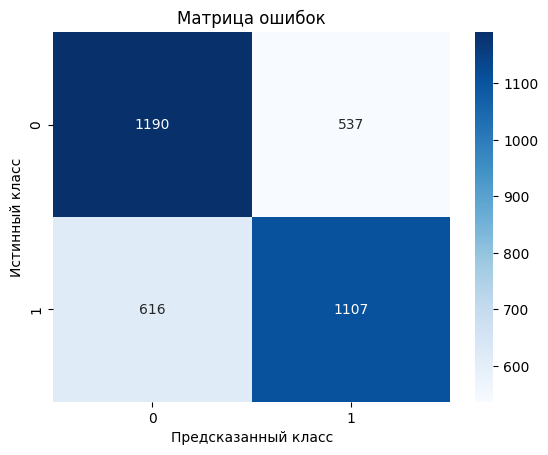

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("Отчёт классификации (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.6530434782608696
Отчёт классификации (XGBoost):
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1727
           1       0.65      0.66      0.66      1723

    accuracy                           0.65      3450
   macro avg       0.65      0.65      0.65      3450
weighted avg       0.65      0.65      0.65      3450



In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 20.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(random_state=42, verbose=100, eval_metric="Accuracy")
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)

print("Accuracy (CatBoost):", accuracy_score(y_test, y_pred_cat))
print("Отчёт классификации (CatBoost):")
print(classification_report(y_test, y_pred_cat))


Learning rate set to 0.031594
0:	learn: 0.6123514	total: 51.6ms	remaining: 51.6s
100:	learn: 0.6243114	total: 367ms	remaining: 3.26s
200:	learn: 0.6280806	total: 709ms	remaining: 2.82s
300:	learn: 0.6343143	total: 1.08s	remaining: 2.52s
400:	learn: 0.6427950	total: 1.47s	remaining: 2.19s
500:	learn: 0.6528704	total: 1.84s	remaining: 1.83s
600:	learn: 0.6601189	total: 2.22s	remaining: 1.47s
700:	learn: 0.6659177	total: 2.6s	remaining: 1.11s
800:	learn: 0.6712815	total: 2.99s	remaining: 743ms
900:	learn: 0.6754856	total: 3.4s	remaining: 374ms
999:	learn: 0.6806321	total: 3.8s	remaining: 0us
Accuracy (CatBoost): 0.6353623188405797
Отчёт классификации (CatBoost):
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      1727
           1       0.63      0.67      0.65      1723

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.63      3450
weighted avg       0.64      0.64      0.63      3450



**временной ряд**

 так как данные организованы как временные ряды (кадры одного видео связаны друг с другом), используем  модель:

LSTM (Long Short-Term Memory) для анализа последовательностей.

In [ ]:
# Форматируем данные в виде временных окон
import numpy as np

window_size = 10
X_lstm = []
y_lstm = []

for i in range(len(X) - window_size):
    X_lstm.append(X.iloc[i:i+window_size].values)
    y_lstm.append(y.iloc[i + window_size])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

print("Форма данных для LSTM:", X_lstm.shape)


Форма данных для LSTM: (13093, 10, 2)


In [ ]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

print("Форма обучающей выборки:", X_train.shape)
print("Форма тестовой выборки:", X_test.shape)


Форма обучающей выборки: (10474, 10, 2)
Форма тестовой выборки: (2619, 10, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Создание модели
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6401 - loss: 0.6499 - val_accuracy: 0.6804 - val_loss: 0.5992
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6766 - loss: 0.6116 - val_accuracy: 0.6728 - val_loss: 0.5907
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6787 - loss: 0.5986 - val_accuracy: 0.6980 - val_loss: 0.5821
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6895 - loss: 0.5935 - val_accuracy: 0.6785 - val_loss: 0.5758
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6926 - loss: 0.5817 - val_accuracy: 0.7003 - val_loss: 0.5672
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6964 - loss: 0.5746 - val_accuracy: 0.7094 - val_loss: 0.5589
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7003 - loss: 0.5687 - val_accuracy: 0.7125 - val_loss: 0.5505
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7005 - loss: 0.5621 - val_accuracy: 0.

In [ ]:
# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тестовой выборке: {accuracy:.4f}")

# Предсказания
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Отчёт классификации
from sklearn.metrics import classification_report
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))


Точность на тестовой выборке: 0.7438
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.68      0.48      0.56       903
           1       0.76      0.88      0.82      1716

    accuracy                           0.74      2619
   macro avg       0.72      0.68      0.69      2619
weighted avg       0.74      0.74      0.73      2619



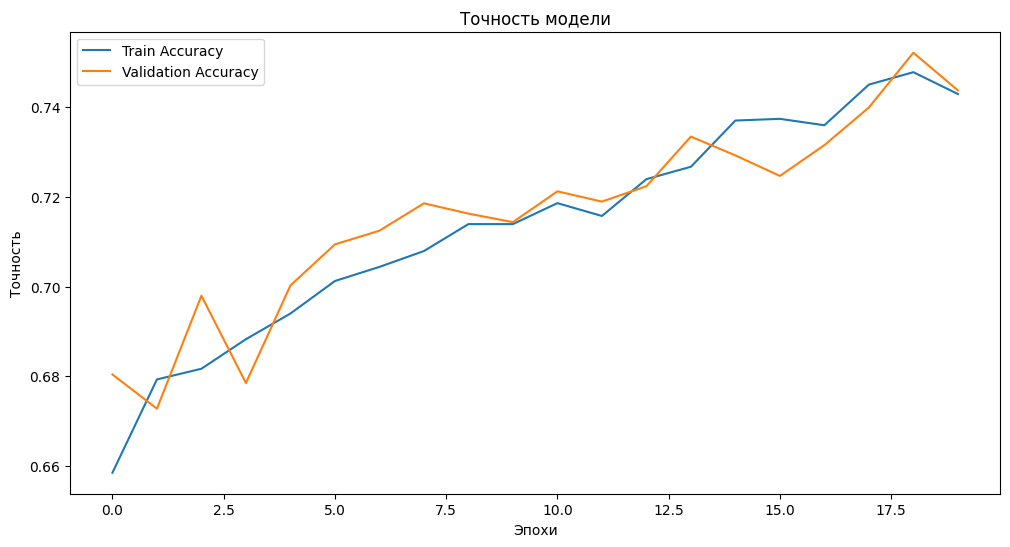

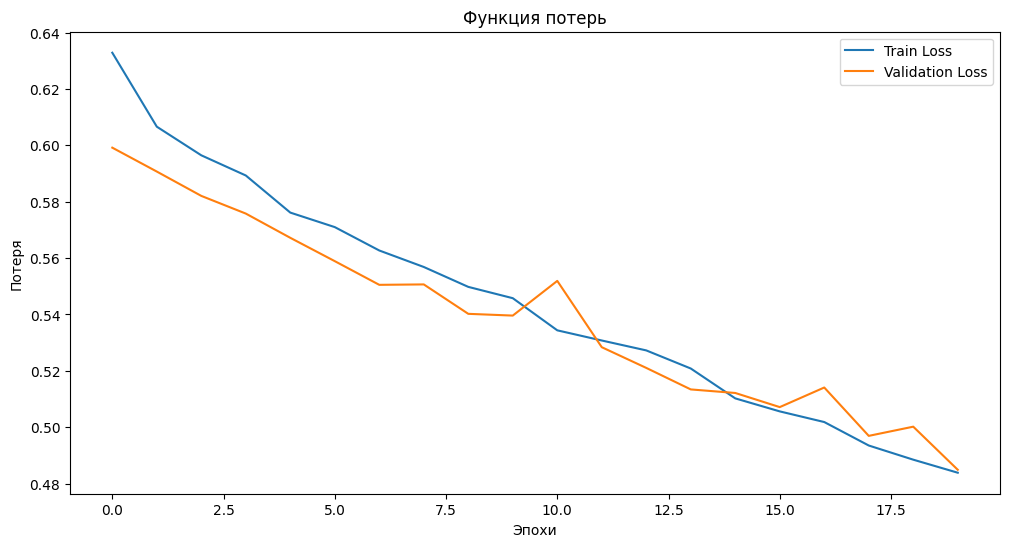

In [ ]:
import matplotlib.pyplot as plt

# График точности
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

# График функции потерь
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Функция потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()
plt.show()


**Генерация новых признаков**
Добавим следующие дополнительные признаки:
средняя скорость (mean_velocity) за окно

стандартное отклонение скорости (std_velocity)

ускорение (acceleration): изменение скорости между кадрами



In [ ]:
import numpy as np
import pandas as pd

# Примерная структура X_lstm, в которой окна (10 кадров) преобразованы в DataFrame
# Для каждого окна добавляем новые признаки
def add_features(X_lstm):
    X_augmented = []
    for sequence in X_lstm:
        df = pd.DataFrame(sequence, columns=['elbow_angle', 'elbow_angle_velocity'])

        # Средняя скорость
        df['mean_velocity'] = df['elbow_angle_velocity'].rolling(window=5).mean().fillna(0)

        # Стандартное отклонение скорости
        df['std_velocity'] = df['elbow_angle_velocity'].rolling(window=5).std().fillna(0)

        # Ускорение
        df['acceleration'] = df['elbow_angle_velocity'].diff().fillna(0)

        # Динамика углов
        df['angle_change'] = df['elbow_angle'].diff().fillna(0)

        # Добавляем признаки для каждого окна
        X_augmented.append(df.values)

    return np.array(X_augmented)

# Применяем генерацию новых признаков
X_lstm_augmented = add_features(X_lstm)

print("Форма данных после добавления признаков:", X_lstm_augmented.shape)


Форма данных после добавления признаков: (13093, 10, 6)


In [ ]:
# Обновление формы данных
X_train, X_test, y_train, y_test = train_test_split(X_lstm_augmented, y_lstm, test_size=0.2, random_state=42)

# Создание модели
model_augmented = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model_augmented.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение
history_augmented = model_augmented.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6481 - loss: 0.6419 - val_accuracy: 0.6819 - val_loss: 0.5888
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6967 - loss: 0.5977 - val_accuracy: 0.6980 - val_loss: 0.5749
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6991 - loss: 0.5803 - val_accuracy: 0.7026 - val_loss: 0.5634
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7029 - loss: 0.5646 - val_accuracy: 0.7148 - val_loss: 0.5718
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7027 - loss: 0.5643 - val_accuracy: 0.7125 - val_loss: 0.5467
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7156 - loss: 0.5482 - val_accuracy: 0.7178 - val_loss: 0.5355
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7184 - loss: 0.5427 - val_accuracy: 0.7205 - val_loss: 0.5327
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7228 - loss: 0.5330 - val_accuracy: 0.7209 - val_

In [ ]:
# Оценка модели
loss, accuracy = model_augmented.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тестовой выборке с новыми признаками: {accuracy:.4f}")

# Предсказания
y_pred = (model_augmented.predict(X_test) > 0.5).astype("int32")

# Отчёт классификации
print("Отчёт классификации с новыми признаками:")
print(classification_report(y_test, y_pred))


Точность на тестовой выборке с новыми признаками: 0.7789
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Отчёт классификации с новыми признаками:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       903
           1       0.82      0.85      0.83      1716

    accuracy                           0.78      2619
   macro avg       0.76      0.75      0.75      2619
weighted avg       0.78      0.78      0.78      2619



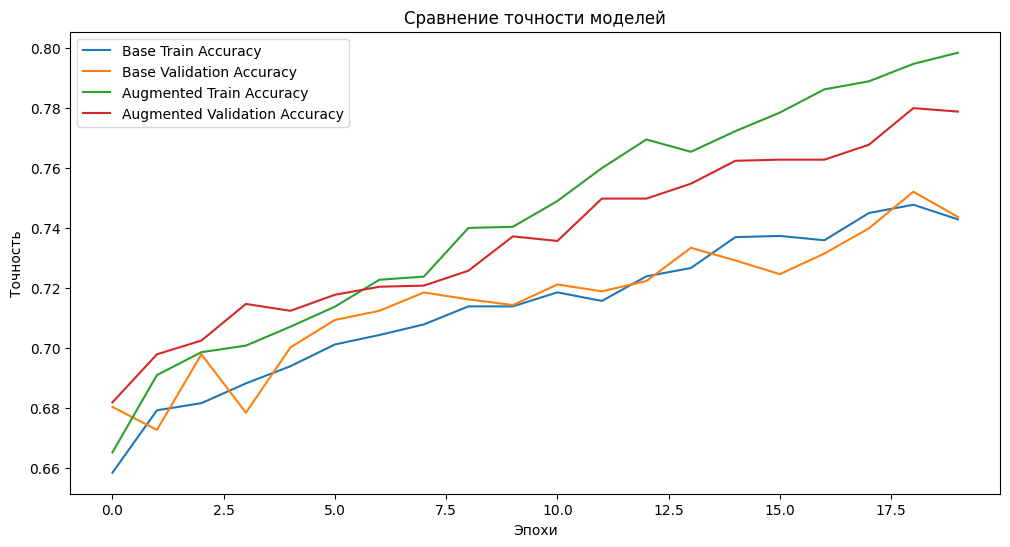

In [ ]:
# Графики точности
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Base Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Base Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation Accuracy')
plt.title('Сравнение точности моделей')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()


важен именно Recall для класса 1, можно настроить взвешенную функцию потерь, чтобы модель больше фокусировалась на этом классе.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Вычисляем веса для каждого класса
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Веса классов:", class_weights_dict)

# Компиляция модели с учётом весов классов
model_augmented.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с весами классов
history_augmented = model_augmented.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)


Веса классов: {0: 1.4640760413754543, 1: 0.7593156444831086}
Epoch 1/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7949 - loss: 0.4106 - val_accuracy: 0.7747 - val_loss: 0.4465
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8028 - loss: 0.3888 - val_accuracy: 0.7671 - val_loss: 0.4595
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 0.3804 - val_accuracy: 0.7721 - val_loss: 0.4511
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8122 - loss: 0.3723 - val_accuracy: 0.7827 - val_loss: 0.4355
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8085 - loss: 0.3719 - val_accuracy: 0.7812 - val_loss: 0.4314
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8142 - loss: 0.3536 - val_accuracy: 0.7763 - val_loss: 0.4260
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8144 - loss: 0.3525 - val_accuracy: 0.7904 - val_loss: 0.4083
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
# Оценка модели
loss, accuracy = model_augmented.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тестовой выборке: {accuracy:.4f}")


Точность на тестовой выборке: 0.8167


In [ ]:
from sklearn.metrics import classification_report

# Предсказания
y_pred = (model_augmented.predict(X_test) > 0.5).astype("int32")

# Отчёт классификации
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       903
           1       0.91      0.80      0.85      1716

    accuracy                           0.82      2619
   macro avg       0.80      0.82      0.81      2619
weighted avg       0.83      0.82      0.82      2619



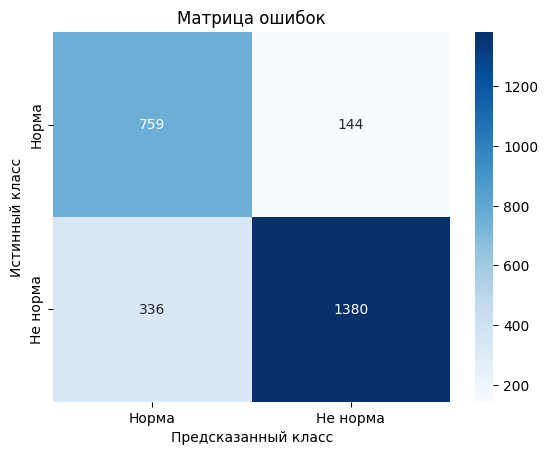

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Норма', 'Не норма'], yticklabels=['Норма', 'Не норма'])
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Увеличенная архитектура модели
model_augmented = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Для бинарной классификации
])

# Компиляция модели
model_augmented.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model_augmented.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 128)             │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,753 (479.50 KB)

 Trainable params: 122,753 (479.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Вычисляем веса классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Веса классов:", class_weights_dict)

# Обучение модели
history_augmented = model_augmented.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)


Веса классов: {0: 1.4640760413754543, 1: 0.7593156444831086}
Epoch 1/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6097 - loss: 0.6649 - val_accuracy: 0.6873 - val_loss: 0.5963
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6751 - loss: 0.6040 - val_accuracy: 0.7113 - val_loss: 0.5593
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6887 - loss: 0.5800 - val_accuracy: 0.6663 - val_loss: 0.5849
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6976 - loss: 0.5640 - val_accuracy: 0.6754 - val_loss: 0.5822
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7143 - loss: 0.5428 - val_accuracy: 0.6877 - val_loss: 0.5741
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7195 - loss: 0.5191 - val_accuracy: 0.7132 - val_loss: 0.5672
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7357 - loss: 0.4978 - val_accuracy: 0.7220 - val_loss: 0.5293
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 

Точность на тестовой выборке: 0.8118
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       903
           1       0.94      0.77      0.84      1716

    accuracy                           0.81      2619
   macro avg       0.80      0.83      0.80      2619
weighted avg       0.84      0.81      0.82      2619



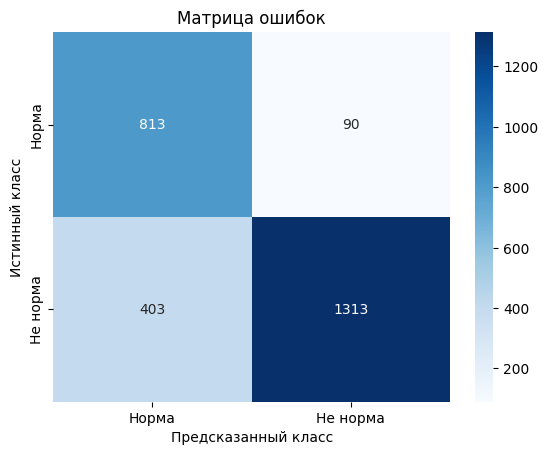

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Оценка модели
loss, accuracy = model_augmented.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тестовой выборке: {accuracy:.4f}")

# Предсказания
y_pred = (model_augmented.predict(X_test) > 0.5).astype("int32")

# Отчёт классификации
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Норма', 'Не норма'], yticklabels=['Норма', 'Не норма'])
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")
plt.show()


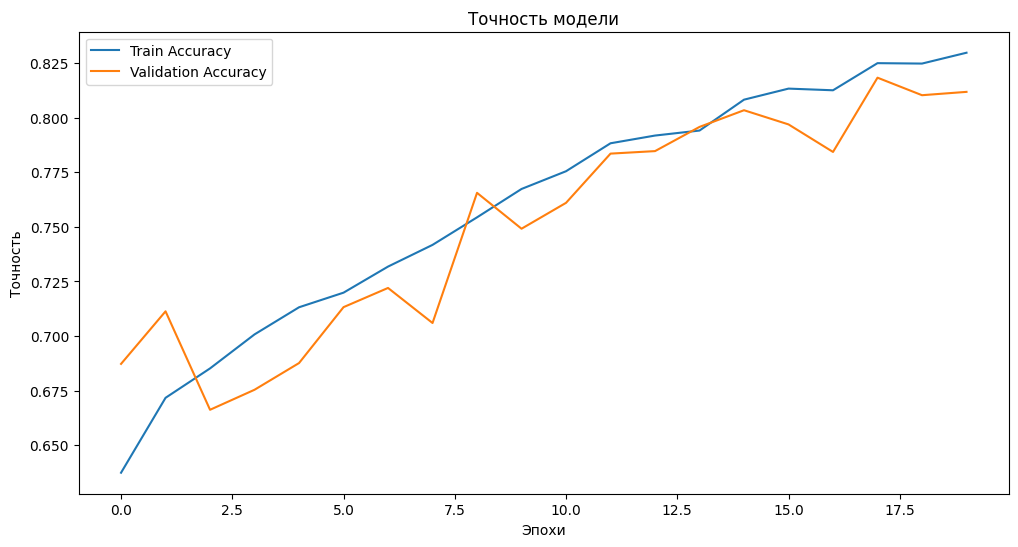

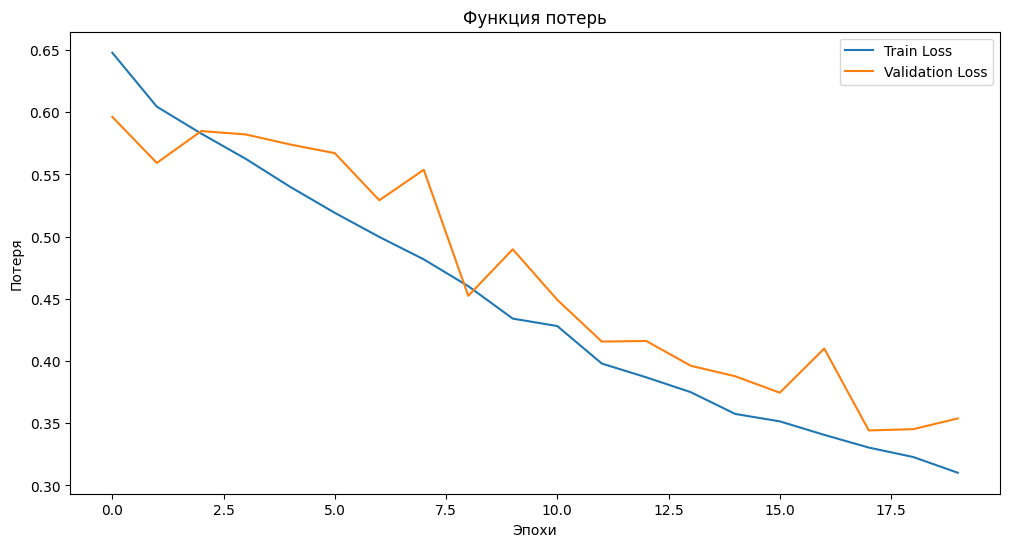

In [ ]:
# Графики точности
plt.figure(figsize=(12, 6))
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Графики функции потерь
plt.figure(figsize=(12, 6))
plt.plot(history_augmented.history['loss'], label='Train Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Функция потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()
plt.show()


Сильные стороны модели:

Модель хорошо определяет класс 1 (Не норма), с высоким Precision (0.94).
Модель не упускает много примеров класса 0 (Норма), так как Recall для этого класса — 0.90.
Слабости модели:

Полнота класса 1 (Не норма) всё ещё не идеальна (Recall = 0.77), что означает, что 23% случаев класса "Не норма" пропущены.
Precision класса 0 (Норма) ниже, что говорит о том, что модель иногда ошибочно относит примеры к "Норма".

In [ ]:
custom_threshold = 0.4
y_pred_custom = (model_augmented.predict(X_test) > custom_threshold).astype("int32")
print("Отчёт классификации с порогом 0.4:")
print(classification_report(y_test, y_pred_custom))


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Отчёт классификации с порогом 0.4:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       903
           1       0.88      0.84      0.86      1716

    accuracy                           0.82      2619
   macro avg       0.80      0.81      0.81      2619
weighted avg       0.83      0.82      0.82      2619



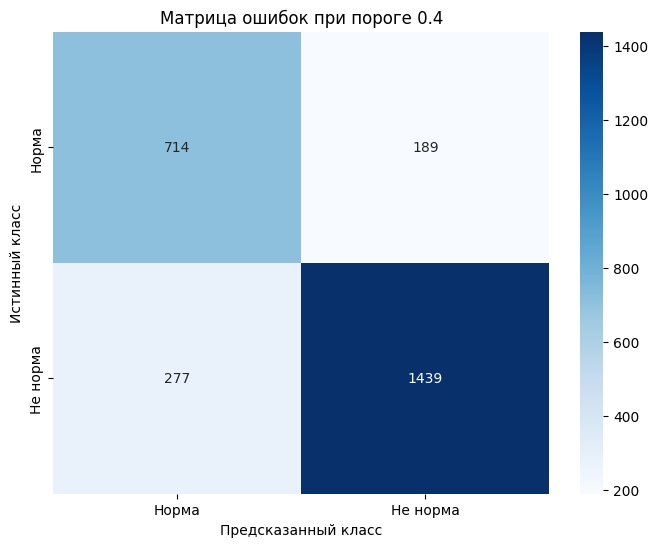

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_custom)  # Используем предсказания с порогом 0.4

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Норма', 'Не норма'], yticklabels=['Норма', 'Не норма'])
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок при пороге 0.4")
plt.show()


In [ ]:
custom_threshold = 0.3
y_pred_custom = (model_augmented.predict(X_test) > custom_threshold).astype("int32")

# Отчёт классификации
from sklearn.metrics import classification_report
print("Отчёт классификации с порогом 0.3:")
print(classification_report(y_test, y_pred_custom))


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Отчёт классификации с порогом 0.3:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       903
           1       0.80      0.94      0.87      1716

    accuracy                           0.81      2619
   macro avg       0.82      0.75      0.77      2619
weighted avg       0.81      0.81      0.80      2619



Анализ результатов:
Цель достигнута: Recall для класса 1 значительно вырос, что является вашей целевой метрикой.
Проблема: Precision для класса 0 (Норма) упал до 56%, что означает увеличение количества ложных положительных предсказаний для этого класса.
Если такая компромиссная модель устраивает, можно зафиксировать её как рабочую.

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


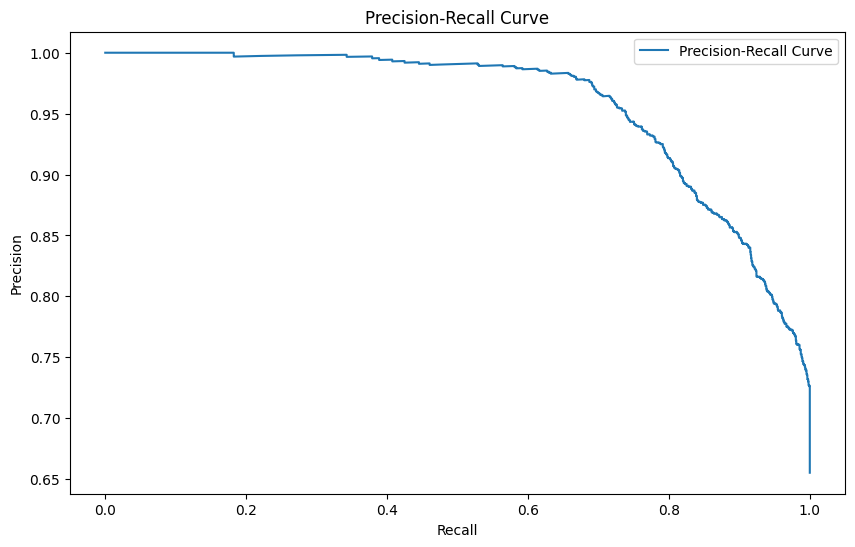

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, model_augmented.predict(X_test))
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
custom_threshold = 0.2
y_pred_custom = (model_augmented.predict(X_test) > custom_threshold).astype("int32")

# Отчёт классификации
from sklearn.metrics import classification_report
print("Отчёт классификации с порогом 0.3:")
print(classification_report(y_test, y_pred_custom))


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Отчёт классификации с порогом 0.3:
              precision    recall  f1-score   support

           0       0.87      0.49      0.63       903
           1       0.78      0.96      0.86      1716

    accuracy                           0.80      2619
   macro avg       0.83      0.73      0.74      2619
weighted avg       0.81      0.80      0.78      2619



Если приоритетом является Recall для класса 1, то модель с порогом 0.2 подходит:

Сильные стороны:
Высокий Recall для класса 1 (96%).
F1-Score для класса 1 = 86%, что подтверждает, что модель достаточно сбалансирована для класса "Не норма".
Слабые стороны:
Recall для класса 0 (Норма) снизился до 49%.
Если цель — находить большинство примеров класса "Не норма", даже с некоторыми ложными срабатываниями, то эту модель можно зафиксировать.

In [ ]:
model_augmented.save('/content/drive/MyDrive/Autism/lstm_model_threshold_0.2.h5')
print("Модель с порогом 0.2 сохранена.")


Модель с порогом 0.2 сохранена.


In [ ]:
custom_threshold = 0.2
y_pred_real = (model_augmented.predict(new_data) > custom_threshold).astype("int32")


Итого базовых скриптов препроцессинга 3
1. конвертация в мр4

In [ ]:
def convert_videos_to_mp4(input_folder, output_folder):
    # Создаем выходную папку, если ее нет
    os.makedirs(output_folder, exist_ok=True)

    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        # Пропускаем файлы, которые не являются видео
        if not file_name.lower().endswith(('.mp4', '.mov', '.vob')):
            continue

        # Создаем выходной путь для файла
        base_name = os.path.splitext(file_name)[0]
        output_path = os.path.join(output_folder, f"{base_name}.mp4")

        # Команда ffmpeg для конвертации
        command = [
            'ffmpeg',
            '-i', input_path,
            '-c:v', 'libx264',  # Кодек для видео
            '-c:a', 'aac',      # Кодек для аудио
            '-strict', 'experimental',
            '-y',               # Перезапись выходного файла
            output_path
        ]

        # Запуск команды
        print(f"Конвертируется файл {input_path} -> {output_path}")
        subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Пути к папкам
norma_path = "/content/drive/MyDrive/Autism/Norma"
ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma"

# Выходные папки
output_norma_path = "/content/drive/MyDrive/Autism/Norma_Converted"
output_ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma_Converted"

# Конвертация видеофайлов
convert_videos_to_mp4(norma_path, output_norma_path)
convert_videos_to_mp4(ne_norma_path, output_ne_norma_path)

2. детекция людей с yolov5

In [ ]:
import os
import cv2
import torch
from pathlib import Path

# Загрузка модели YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Функция извлечения фреймов
def extract_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"frame_{frame_count:05d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_count += 1
    cap.release()
    print(f"Извлечено {frame_count} фреймов из {video_path} в {output_folder}")

# Функция обработки фреймов YOLOv5
def process_frames(input_folder, output_folder, crop_objects=False):
    os.makedirs(output_folder, exist_ok=True)

    for frame_file in sorted(os.listdir(input_folder)):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)

        # Детекция объектов
        results = model(frame)
        detections = results.pandas().xyxy[0]

        for _, row in detections.iterrows():
            if row['name'] == 'person':  # Если обнаружен человек
                x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

                if crop_objects:  # Обрезаем только область с человеком
                    person_frame = frame[y1:y2, x1:x2]
                    output_path = os.path.join(output_folder, f"crop_{frame_file}")
                    cv2.imwrite(output_path, person_frame)
                else:  # Рисуем рамки на исходном фрейме
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f"Person {row['confidence']:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        if not crop_objects:
            output_path = os.path.join(output_folder, frame_file)
            cv2.imwrite(output_path, frame)

    print(f"Обработанные фреймы сохранены в {output_folder}")

# Основной процесс обработки всех видео в папке
def process_videos(input_folder, output_folder, crop_objects=False):
    for video_file in os.listdir(input_folder):
        if not video_file.endswith('.mp4'):
            continue
        video_path = os.path.join(input_folder, video_file)
        video_name = Path(video_file).stem
        frames_folder = os.path.join(output_folder, f"{video_name}_frames")
        processed_frames_folder = os.path.join(output_folder, f"{video_name}_processed_frames")

        # Этапы обработки
        print(f"Обработка видео: {video_path}")
        extract_frames(video_path, frames_folder)
        process_frames(frames_folder, processed_frames_folder, crop_objects=crop_objects)

# Пути к папкам с обработанными фреймами
norma_frames_path = "/content/drive/MyDrive/Autism/Processed_Frames/Norma"
ne_norma_frames_path = "/content/drive/MyDrive/Autism/Processed_Frames/Ne_norma"

# Обработка всех видео
process_videos(norma_converted_path, norma_frames_path, crop_objects=True)  # Устанавливаем True для вырезания людей
process_videos(ne_norma_converted_path, ne_norma_frames_path, crop_objects=True)


3.Скрипт  Mediapipe

In [ ]:
#Это основной скрипт выполняющий препроцессинг описанный выше - медиапайп режет кадры, извлекает точки, рассчитывает углы и скорость и сохраняет все в папки Cropped
import mediapipe as mp
import cv2
import os
import pandas as pd
import numpy as np

# Инициализация MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Функция для обрезки кадров
def crop_frames(input_folder, output_folder, crop_ratio=0.5):
    os.makedirs(output_folder, exist_ok=True)
    for frame_file in os.listdir(input_folder):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        h, w, _ = frame.shape
        crop_h, crop_w = int(h * crop_ratio), int(w * crop_ratio)
        y1, y2 = (h - crop_h) // 2, (h + crop_h) // 2
        x1, x2 = (w - crop_w) // 2, (w + crop_w) // 2
        cropped_frame = frame[y1:y2, x1:x2]
        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, cropped_frame)
    print(f"Кадры обрезаны и сохранены в {output_folder}")

# Функция для извлечения ключевых точек
def extract_keypoints_from_frames(frames_folder, output_csv):
    keypoints = []
    frame_files = sorted(os.listdir(frames_folder))
    for frame_file in frame_files:
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            keypoints.append([frame_file] +
                             [landmark.x for landmark in landmarks] +
                             [landmark.y for landmark in landmarks] +
                             [landmark.z for landmark in landmarks] +
                             [landmark.visibility for landmark in landmarks])
        else:
            keypoints.append([frame_file] + [np.nan] * (33 * 4))
    columns = (['frame'] +
               [f'x{i}' for i in range(33)] +
               [f'y{i}' for i in range(33)] +
               [f'z{i}' for i in range(33)] +
               [f'visibility{i}' for i in range(33)])
    df = pd.DataFrame(keypoints, columns=columns)
    df.to_csv(output_csv, index=False)
    print(f"Ключевые точки сохранены в {output_csv}")

# Функция для расчёта углов
def calculate_angles(keypoints_csv, output_csv):
    df = pd.read_csv(keypoints_csv)
    angles = []
    for i in range(len(df)):
        try:
            shoulder = np.array([df.loc[i, 'x12'], df.loc[i, 'y12']])
            elbow = np.array([df.loc[i, 'x14'], df.loc[i, 'y14']])
            wrist = np.array([df.loc[i, 'x16'], df.loc[i, 'y16']])
            vec1, vec2 = shoulder - elbow, wrist - elbow
            cos_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            angle = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))
            angles.append(angle)
        except:
            angles.append(np.nan)
    df['elbow_angle'] = angles
    df.to_csv(output_csv, index=False)
    print(f"Углы сохранены в {output_csv}")

# Функция для расчёта скорости углов
def calculate_angle_velocity(angles_csv, output_csv):
    df = pd.read_csv(angles_csv)
    df['elbow_angle_velocity'] = df['elbow_angle'].diff().fillna(0)
    df.to_csv(output_csv, index=False)
    print(f"Скорость изменения углов сохранена в {output_csv}")

# Универсальная функция для обработки всех шагов
def process_all_videos(input_folder, output_folder, crop_ratio=0.5):
    os.makedirs(output_folder, exist_ok=True)
    for video_folder in os.listdir(input_folder):
        frames_folder = os.path.join(input_folder, video_folder)
        if not os.path.isdir(frames_folder):
            continue

        # Обрезка кадров
        cropped_frames_folder = os.path.join(output_folder, f"{video_folder}_cropped_frames")
        crop_frames(frames_folder, cropped_frames_folder, crop_ratio)

        # Извлечение ключевых точек
        keypoints_output_csv = os.path.join(output_folder, f"{video_folder}_keypoints.csv")
        extract_keypoints_from_frames(cropped_frames_folder, keypoints_output_csv)

        # Рассчёт углов
        angles_output_csv = os.path.join(output_folder, f"{video_folder}_angles.csv")
        calculate_angles(keypoints_output_csv, angles_output_csv)

        # Рассчёт скорости углов
        angle_velocity_output_csv = os.path.join(output_folder, f"{video_folder}_angle_velocity.csv")
        calculate_angle_velocity(angles_output_csv, angle_velocity_output_csv)

        print(f"Обработка завершена для: {video_folder}")

        # Пути
norma_input = "/content/drive/MyDrive/Autism/Processed_Frames/Norma"
norma_output = "/content/drive/MyDrive/Autism/Keypoints/Norma_Cropped"


# Обработка папки Норма
process_all_videos(norma_input, norma_output, crop_ratio=0.5)

# Пути

ne_norma_input = "/content/drive/MyDrive/Autism/Processed_Frames/Ne_norma"
ne_norma_output = "/content/drive/MyDrive/Autism/Keypoints/Ne_norma_Cropped"

# Обработка папки Не норма
process_all_videos(ne_norma_input, ne_norma_output, crop_ratio=0.5)


**итого универсальный скрипт полного препроцессинга**

In [ ]:
import os
import cv2
import subprocess
import torch
import mediapipe as mp
import pandas as pd
import numpy as np
from pathlib import Path

# Загрузка модели YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Инициализация MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Конвертация видео в MP4
def convert_videos_to_mp4(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        if not file_name.lower().endswith(('.mp4', '.mov', '.vob')):
            continue
        base_name = os.path.splitext(file_name)[0]
        output_path = os.path.join(output_folder, f"{base_name}.mp4")
        command = [
            'ffmpeg',
            '-i', input_path,
            '-c:v', 'libx264',
            '-c:a', 'aac',
            '-strict', 'experimental',
            '-y',
            output_path
        ]
        print(f"Конвертируется файл {input_path} -> {output_path}")
        subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Извлечение и обработка фреймов с YOLOv5
def extract_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"frame_{frame_count:05d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_count += 1
    cap.release()
    print(f"Извлечено {frame_count} фреймов из {video_path} в {output_folder}")

def process_frames(input_folder, output_folder, crop_objects=False):
    os.makedirs(output_folder, exist_ok=True)
    for frame_file in sorted(os.listdir(input_folder)):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        results = model(frame)
        detections = results.pandas().xyxy[0]
        for _, row in detections.iterrows():
            if row['name'] == 'person':
                x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
                if crop_objects:
                    person_frame = frame[y1:y2, x1:x2]
                    output_path = os.path.join(output_folder, f"crop_{frame_file}")
                    cv2.imwrite(output_path, person_frame)
                else:
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        if not crop_objects:
            output_path = os.path.join(output_folder, frame_file)
            cv2.imwrite(output_path, frame)
    print(f"Обработанные фреймы сохранены в {output_folder}")

def process_videos(input_folder, output_folder, crop_objects=False):
    for video_file in os.listdir(input_folder):
        if not video_file.endswith('.mp4'):
            continue
        video_path = os.path.join(input_folder, video_file)
        video_name = Path(video_file).stem
        frames_folder = os.path.join(output_folder, f"{video_name}_frames")
        processed_frames_folder = os.path.join(output_folder, f"{video_name}_processed_frames")
        print(f"Обработка видео: {video_path}")
        extract_frames(video_path, frames_folder)
        process_frames(frames_folder, processed_frames_folder, crop_objects=crop_objects)

# Извлечение ключевых точек, углов и скоростей
def crop_frames(input_folder, output_folder, crop_ratio=0.5):
    os.makedirs(output_folder, exist_ok=True)
    for frame_file in os.listdir(input_folder):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        h, w, _ = frame.shape
        crop_h, crop_w = int(h * crop_ratio), int(w * crop_ratio)
        y1, y2 = (h - crop_h) // 2, (h + crop_h) // 2
        x1, x2 = (w - crop_w) // 2, (w + crop_w) // 2
        cropped_frame = frame[y1:y2, x1:x2]
        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, cropped_frame)

def extract_keypoints_from_frames(frames_folder, output_csv):
    keypoints = []
    for frame_file in sorted(os.listdir(frames_folder)):
        if not frame_file.endswith('.jpg'):
            continue
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            keypoints.append([frame_file] +
                             [landmark.x for landmark in landmarks] +
                             [landmark.y for landmark in landmarks] +
                             [landmark.z for landmark in landmarks] +
                             [landmark.visibility for landmark in landmarks])
        else:
            keypoints.append([frame_file] + [np.nan] * (33 * 4))
    columns = (['frame'] +
               [f'x{i}' for i in range(33)] +
               [f'y{i}' for i in range(33)] +
               [f'z{i}' for i in range(33)] +
               [f'visibility{i}' for i in range(33)])
    pd.DataFrame(keypoints, columns=columns).to_csv(output_csv, index=False)

def calculate_angles(keypoints_csv, output_csv):
    df = pd.read_csv(keypoints_csv)
    angles = []
    for i in range(len(df)):
        try:
            shoulder = np.array([df.loc[i, 'x12'], df.loc[i, 'y12']])
            elbow = np.array([df.loc[i, 'x14'], df.loc[i, 'y14']])
            wrist = np.array([df.loc[i, 'x16'], df.loc[i, 'y16']])
            vec1, vec2 = shoulder - elbow, wrist - elbow
            cos_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            angle = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))
            angles.append(angle)
        except:
            angles.append(np.nan)
    df['elbow_angle'] = angles
    df.to_csv(output_csv, index=False)

def calculate_angle_velocity(angles_csv, output_csv):
    df = pd.read_csv(angles_csv)
    df['elbow_angle_velocity'] = df['elbow_angle'].diff().fillna(0)
    df.to_csv(output_csv, index=False)

def process_all_videos(input_folder, output_folder, crop_ratio=0.5):
    os.makedirs(output_folder, exist_ok=True)
    for video_folder in os.listdir(input_folder):
        frames_folder = os.path.join(input_folder, video_folder)
        if not os.path.isdir(frames_folder):
            continue
        cropped_frames_folder = os.path.join(output_folder, f"{video_folder}_cropped_frames")
        crop_frames(frames_folder, cropped_frames_folder, crop_ratio)
        keypoints_output_csv = os.path.join(output_folder, f"{video_folder}_keypoints.csv")
        extract_keypoints_from_frames(cropped_frames_folder, keypoints_output_csv)
        angles_output_csv = os.path.join(output_folder, f"{video_folder}_angles.csv")
        calculate_angles(keypoints_output_csv, angles_output_csv)
        angle_velocity_output_csv = os.path.join(output_folder, f"{video_folder}_angle_velocity.csv")
        calculate_angle_velocity(angles_output_csv, angle_velocity_output_csv)

# Основной процесс
def main():
    # Пути для этапа 1 (конвертация видео)
    norma_path = "/content/drive/MyDrive/Autism/Norma"
    ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma"
    output_norma_path = "/content/drive/MyDrive/Autism/Norma_Converted"
    output_ne_norma_path = "/content/drive/MyDrive/Autism/Ne_norma_Converted"
    convert_videos_to_mp4(norma_path, output_norma_path)
    convert_videos_to_mp4(ne_norma_path, output_ne_norma_path)

    # Пути для этапа 2 (обработка с YOLOv5)
    norma_frames_path = "/content/drive/MyDrive/Autism/Processed_Frames/Norma
